Modele IA notebook , application digit recognition
Réalisé par :

*   Fatima OUDAHMANE
*   Ayse   YILDRIM
*   Fatima OUDAHMANE
*   Ahmed Amine BOUTHALEB


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Data cleaning des données MNIST format csv**




In [ ]:
# Importer pandas , fichiers CSV
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/data/train.csv')

test_df = pd.read_csv('/content/drive/MyDrive/data/test.csv')


In [ ]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Séparer les features et les labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']



In [ ]:
#Normaliser kes valeurs des pixels pour etres comprise entre 0 et 1


X_train = X_train / 255.0
X_test = test_df / 255.0

# **Visualisation des données MNIST format csv**



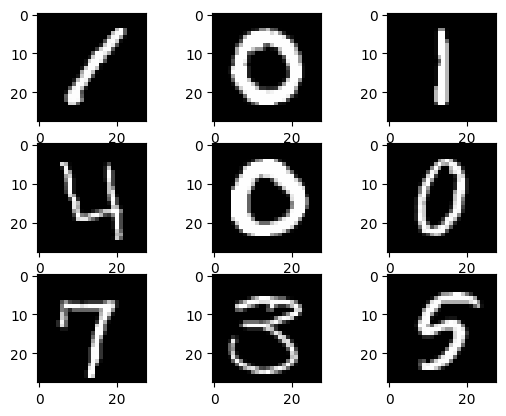

In [ ]:
# Visualiser les données d'entraînement

import matplotlib.pyplot as plt

# Fonction pour visualiser quelques images
def visualize_data(data):
    for i in range(9):
        plt.subplot(330 + 1 + i)  # Créer un subplot
        plt.imshow(data.iloc[i].values.reshape((28,28)), cmap=plt.get_cmap('gray'))  # Redimensionner pour obtenir une image 28x28


visualize_data(X_train)
plt.show()



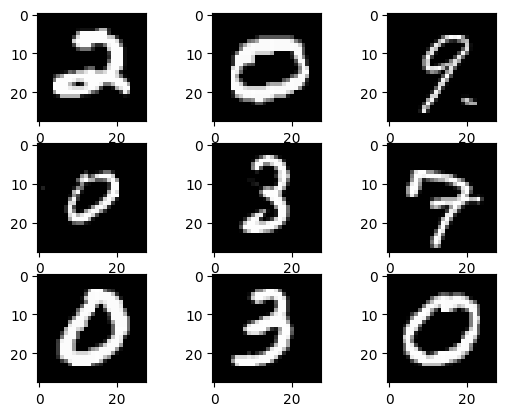

In [ ]:
# Visualiser les données de test

visualize_data(X_test)
plt.show()

## **1. Maching Learning MNIST format csv**

### ***Modèle de Régression Logistique***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Créer un modèle de régression logistique
lr_model = LogisticRegression(max_iter=10000)

# Entraîner le modèle
lr_model.fit(X_train, y_train)

# Prédire les labels sur l'ensemble d'entraînement
lr_predictions = lr_model.predict(X_train)

# Calculer la précision
lr_accuracy = accuracy_score(y_train, lr_predictions)
print(f"Accuracy of Logistic Regression: {lr_accuracy}")



Accuracy of Logistic Regression: 0.9433095238095238


Le modèle a correctement prédit les labels pour environ 94% des images dans l'ensemble de données sur lequel il a été évalué

In [ ]:
# Faire des prédictions sur l'ensemble de test
test_predictions = lr_model.predict(X_test)

# Imprimer les prédictions
print(test_predictions)


[2 0 9 ... 3 9 2]


### Prédiction et test du Modèle de Régression Logistique

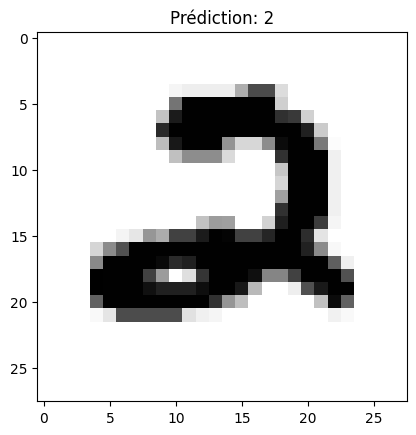

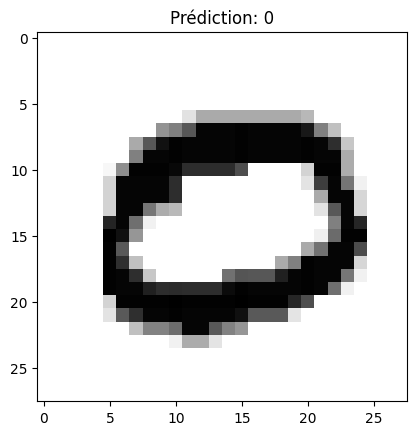

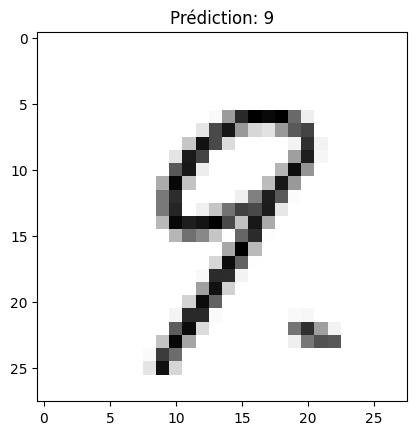

In [ ]:
import matplotlib.pyplot as plt

# Convertir le DataFrame en un tableau numpy
X_test_np = X_test.to_numpy()

# Choisir un nombre d'images à visualiser
num_images = 3

# Si "test_predictions" n'est pas défini, remplacez-le par "svm_predictions_test" ou toute autre variable de prédiction que vous avez.
for i in range(num_images):
    plt.imshow(X_test_np[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title(f"Prédiction: {test_predictions[i]}")
    plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluer le modèle en utilisant la validation croisée
cross_val_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Imprimer les scores de chaque fold
print(cross_val_scores)

# Imprimer le score moyen
print("Accuracy moyenne avec la validation croisée :", cross_val_scores.mean())


[0.91857143 0.91738095 0.91559524 0.9175     0.92214286]
Accuracy moyenne avec la validation croisée : 0.9182380952380953


### **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

# Créer un modèle SVM
svm_model = SVC()

# Entraîner le modèle
svm_model.fit(X_train, y_train)

# Prédire les labels sur l'ensemble d'entraînement
svm_predictions = svm_model.predict(X_train)

# Calculer la précision
svm_accuracy = accuracy_score(y_train, svm_predictions)
print(f"Accuracy of SVM: {svm_accuracy}")

Accuracy of SVM: 0.9891428571428571


Une précision de 98% avec le modèle Support Vector Machine (SVM) est excellente. Cela signifie que votre modèle a correctement classifié 98% des images de chiffres manuscrits dans votre ensemble de données d'entraînement ou de validation. Il a bien appris à reconnaître et à prédire les chiffres de 0 à 9 à partir des images manuscrites.

In [ ]:
svm_predictions_test = svm_model.predict(X_test)

# Afficher quelques prédictions
print(f"Predictions: {svm_predictions_test[:5]}")

Predictions: [2 0 9 9 3]


### **Random forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Création du modèle Random Forest
rf_model = RandomForestClassifier()

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédiction des labels sur l'ensemble de validation
rf_predictions = rf_model.predict(X_val)

# Calcul de la précision
rf_accuracy = accuracy_score(y_val, rf_predictions)
print(f"Accuracy of Random Forest: {rf_accuracy}")



Accuracy of Random Forest: 0.9629761904761904


le score est de 96% c'est un trés bon résultat , cela montre que le modele est capable de classer un grand nombre mages de chiffres manuscrits

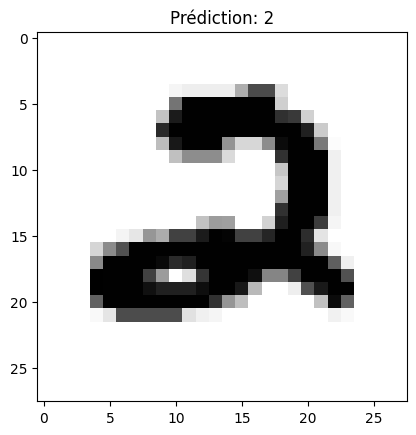

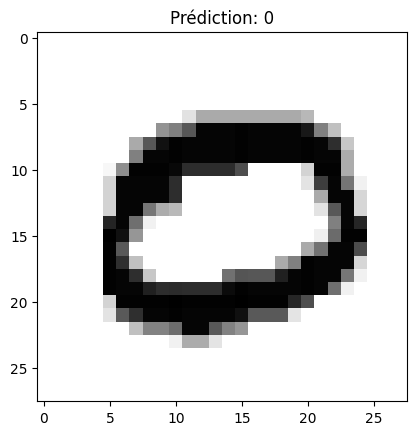

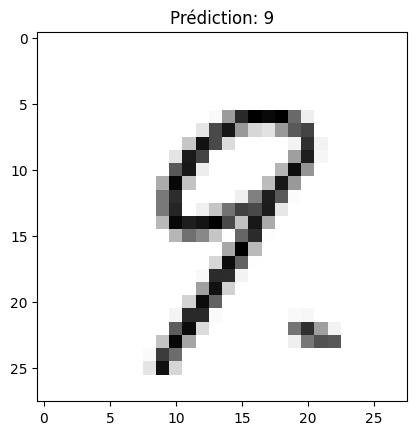

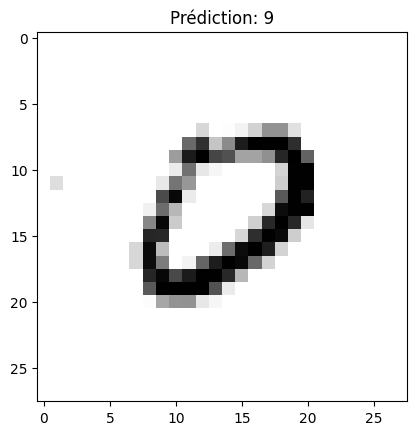

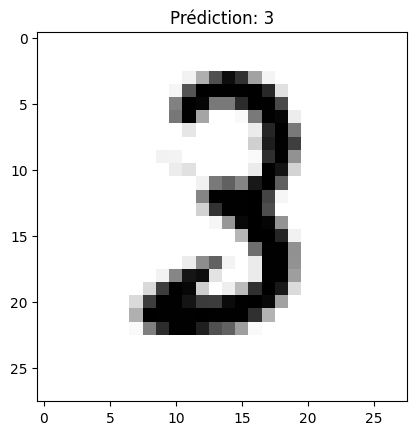

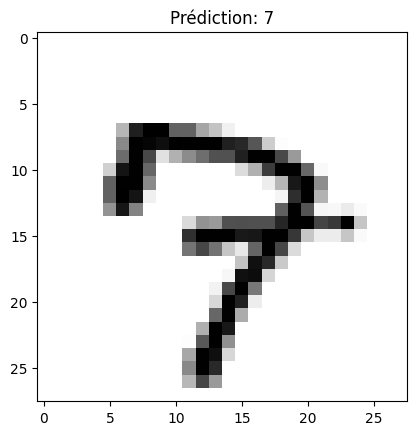

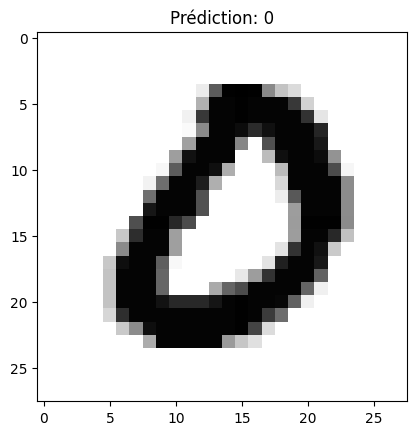

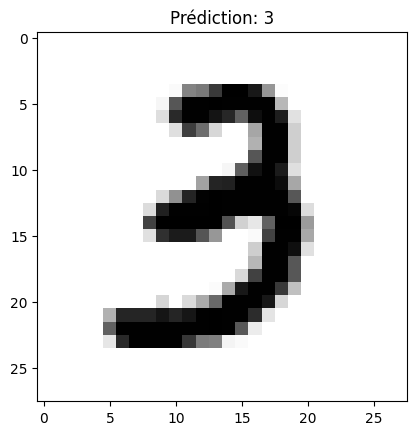

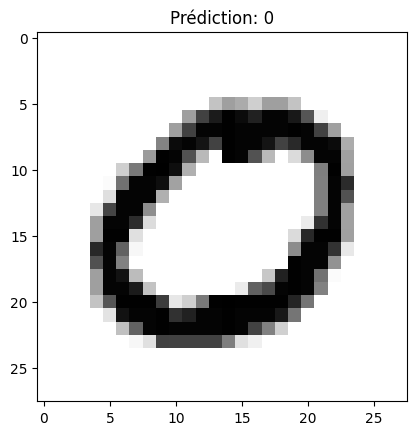

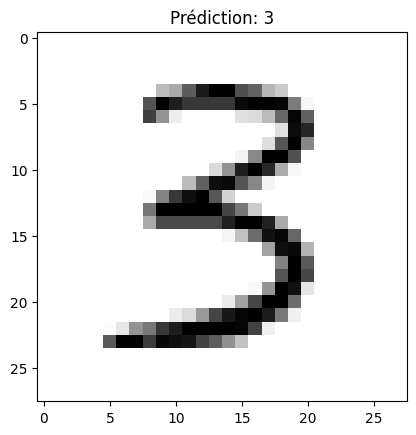

In [ ]:
# Prédiction des labels sur l'ensemble de test
rf_predictions_test = rf_model.predict(X_test)

# Visualiser les prédictions
# Convertir le DataFrame en un tableau numpy pour la visualisation
X_test_np = X_test.to_numpy()

# Choisir un nombre d'images à visualiser
num_images = 10

for i in range(num_images):
    plt.imshow(X_test_np[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title(f"Prédiction: {rf_predictions_test[i]}")
    plt.show()


### **Réseau de Neurones Simple avec Keras**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Créer un modèle de réseau de neurones
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Entraîner le modèle
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Évaluer la précision
nn_accuracy = nn_model.evaluate(X_train, y_train)[1]
print(f"Accuracy of Neural Network: {nn_accuracy}")

Epoch 1/10
1050/1050 [==============================] - 9s 3ms/step - loss: 0.3033 - accuracy: 0.9114
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1239 - accuracy: 0.9614
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0858 - accuracy: 0.9735
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0641 - accuracy: 0.9794
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0470 - accuracy: 0.9861
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0376 - accuracy: 0.9878
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0276 - accuracy: 0.9914
Epoch 8/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0271 - accuracy: 0.9906
Epoch 9/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0194 - accuracy: 0.9941
Epoch 10/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.016

875/875 [==============================] - 1s 2ms/step


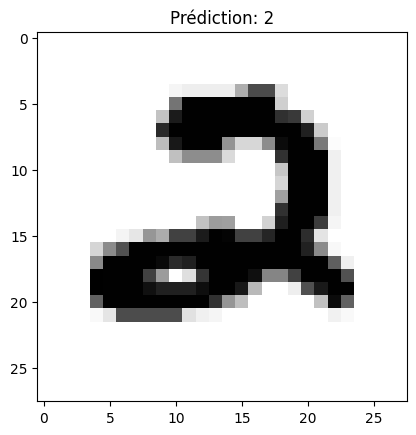

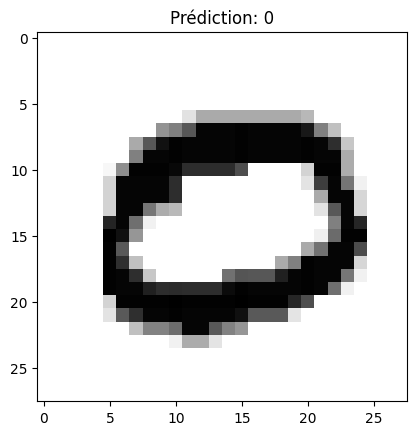

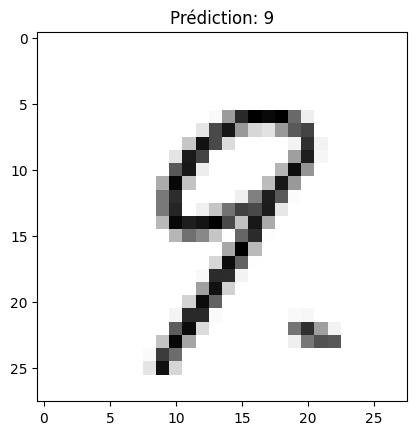

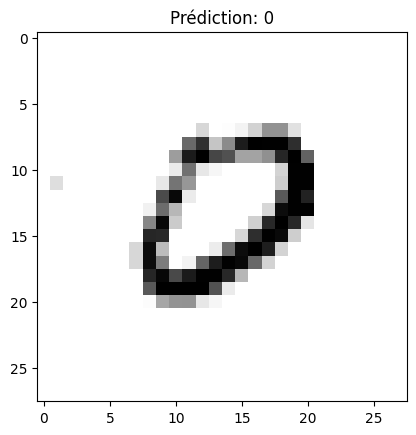

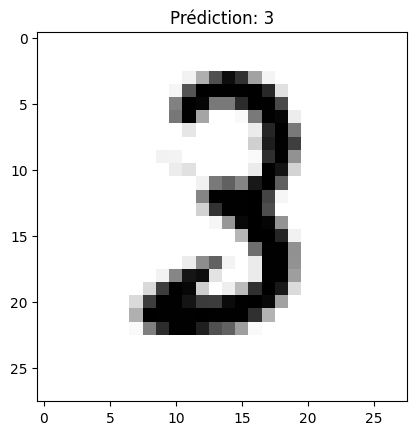

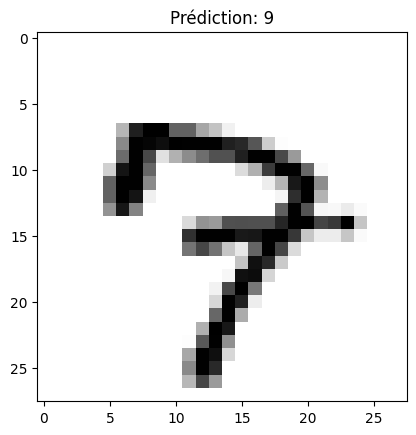

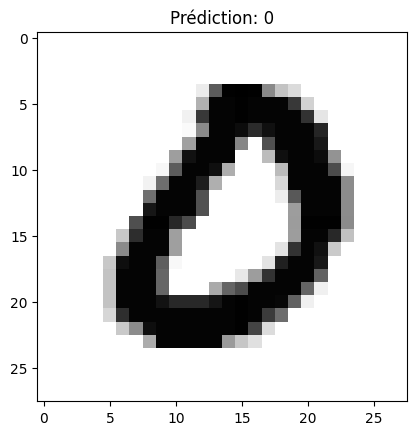

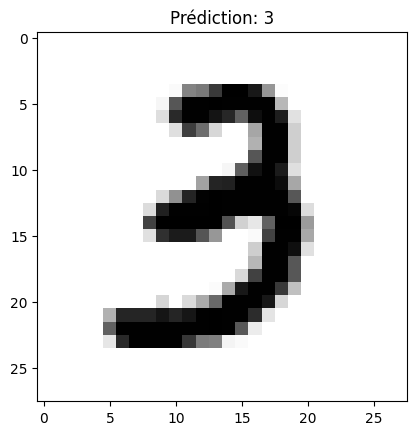

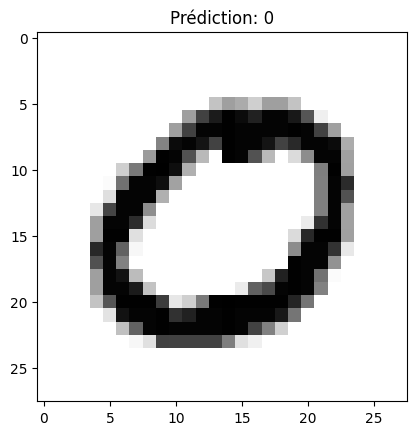

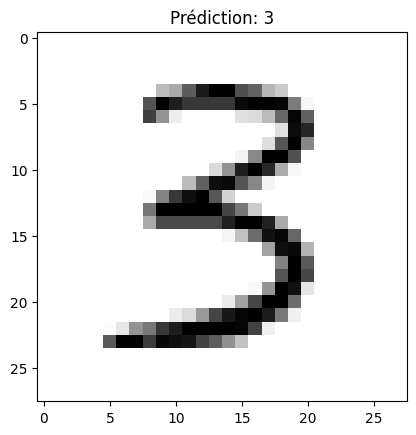

In [ ]:
# Faire des prédictions sur l'ensemble de test
nn_test_predictions = nn_model.predict(X_test)

# Convertir les prédictions en étiquettes
nn_test_labels = np.argmax(nn_test_predictions, axis=1)

# Visualiser quelques prédictions
import matplotlib.pyplot as plt

# Convertir le DataFrame en un tableau numpy pour la visualisation
X_test_np = X_test.to_numpy()

# Choisir un nombre d'images à visualiser
num_images = 10

for i in range(num_images):
    plt.imshow(X_test_np[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title(f"Prédiction: {nn_test_labels[i]}")
    plt.show()


# **2. Deep Learning MNIST format PNJ**

### **Les réseaux de neurones convolutionnels (CNN)**

Pourquoi CNN pour la classification d'images ?
Les CNN (Convolutional Neural Networks) sont particulièrement efficaces pour les tâches de classification d'images car ils peuvent automatiquement et adaptativement apprendre des hiérarchies spatiales de caractéristiques à partir des images d'entraînement. Les CNN sont moins sensibles à la taille, à l'échelle et à l'orientation des objets dans l'image, ce qui les rend très efficaces pour la classification des images

**Data cleaning des données MNIST format PNJ**

In [ ]:
import os
from PIL import Image
import numpy as np

def load_dataset(folder_path, is_training=True):
    images = []
    labels = []
    print(f"Chargement des données à partir de {folder_path}")

    if is_training:
        # Pour les données d'entraînement avec des sous-dossiers
        for label in os.listdir(folder_path):
            label_folder = os.path.join(folder_path, label)

            if os.path.isdir(label_folder):
                print(f"Chargement des images à partir de {label_folder} avec l'étiquette {label}")

                for image_file in os.listdir(label_folder):
                    image_path = os.path.join(label_folder, image_file)

                    if image_file.endswith('.png') or image_file.endswith('.jpg'):
                        image = Image.open(image_path)
                        images.append(np.array(image))
                        labels.append(int(label))

    else:
        # Pour les données de test sans sous-dossiers
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)

            if image_file.endswith('.png') or image_file.endswith('.jpg'):
                image = Image.open(image_path)
                images.append(np.array(image))

    print(f"{len(images)} images chargées")

    if is_training:
        return np.array(images), np.array(labels)
    else:
        return np.array(images)

# Chemins vers vos dossiers de données
train_folder = '/content/drive/MyDrive/data/trainingSet'
test_folder = '/content/drive/MyDrive/data/testSet'

# Charger les données
train_images, train_labels = load_dataset(train_folder, is_training=True)
test_images = load_dataset(test_folder, is_training=False)

print("Forme des étiquettes d'entraînement :", train_labels.shape)
print("Forme des images d'entraînement :", train_images.shape)
print("Forme des images de test :", test_images.shape)




Chargement des données à partir de /content/drive/MyDrive/data/trainingSet
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/9 avec l'étiquette 9
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/8 avec l'étiquette 8
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/7 avec l'étiquette 7
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/6 avec l'étiquette 6
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/5 avec l'étiquette 5
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/4 avec l'étiquette 4
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/3 avec l'étiquette 3
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/2 avec l'étiquette 2
Chargement des images à partir de /content/drive/MyDrive/data/trainingSet/1 avec l'étiquette 1
Chargement des images à partir de /content/drive/MyDrive/data/training

In [ ]:
X_train = train_images / 255.0
X_test = test_images / 255.0

from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(train_labels)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))



In [ ]:

# Création du modèle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax', kernel_regularizer=l2(0.01))
])





In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

datagen.fit(X_train)



In [ ]:

# Utilisation de Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=32),
                    validation_data=(X_val, y_val_one_hot),
                    epochs=10,
                    callbacks=[early_stop])




Epoch 1/10
1051/1051 [==============================] - 17s 15ms/step - loss: 1.4677 - accuracy: 0.6824 - val_loss: 0.6956 - val_accuracy: 0.9463
Epoch 2/10
1051/1051 [==============================] - 18s 17ms/step - loss: 1.1498 - accuracy: 0.7859 - val_loss: 0.6845 - val_accuracy: 0.9475
Epoch 3/10
1051/1051 [==============================] - 18s 17ms/step - loss: 1.1079 - accuracy: 0.8002 - val_loss: 0.6578 - val_accuracy: 0.9575
Epoch 4/10
1051/1051 [==============================] - 16s 15ms/step - loss: 1.0883 - accuracy: 0.8074 - val_loss: 0.6712 - val_accuracy: 0.9518
Epoch 5/10
1051/1051 [==============================] - 16s 15ms/step - loss: 1.0802 - accuracy: 0.8112 - val_loss: 0.6474 - val_accuracy: 0.9602
Epoch 6/10
1051/1051 [==============================] - 16s 16ms/step - loss: 1.0776 - accuracy: 0.8123 - val_loss: 0.6526 - val_accuracy: 0.9526
Epoch 7/10
1051/1051 [==============================] - 16s 15ms/step - loss: 1.0760 - accuracy: 0.8122 - val_loss: 0.6336 -

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_local.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


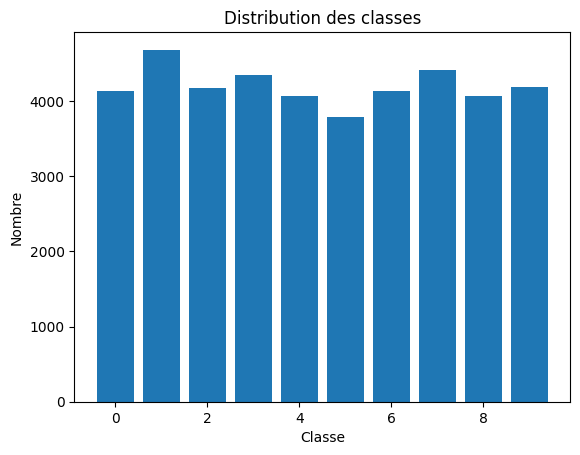

In [ ]:
import matplotlib.pyplot as plt
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts)
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre')
plt.show()



In [ ]:
# Prédiction
predictions = model.predict(X_test)



67/67 [==============================] - 0s 3ms/step


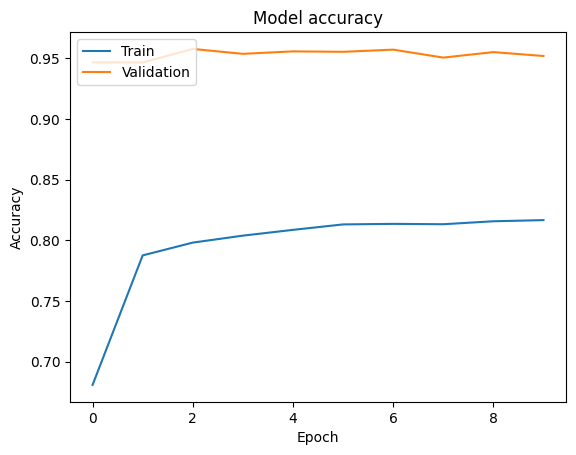

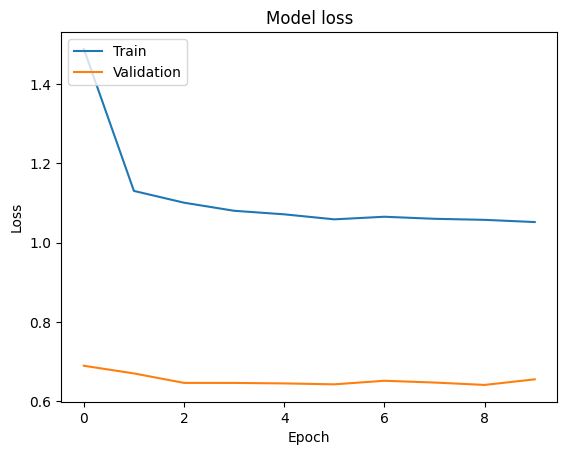

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


67/67 [==============================] - 0s 5ms/step


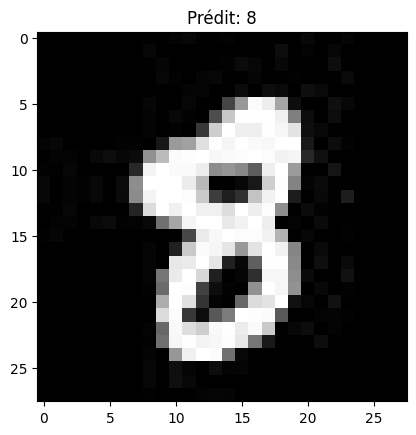

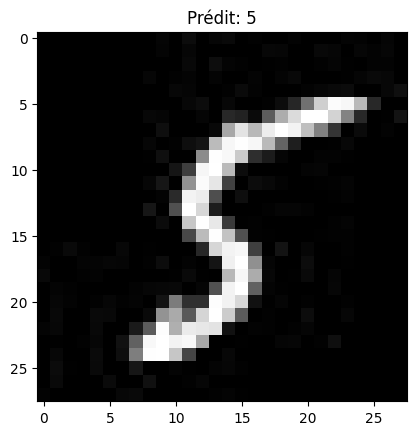

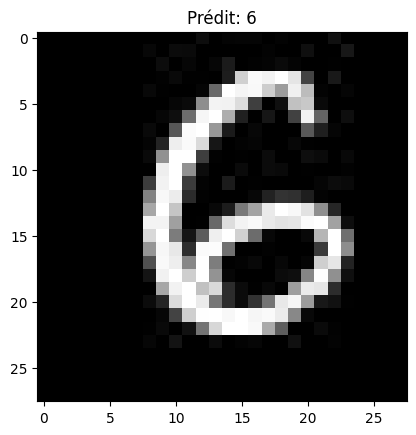

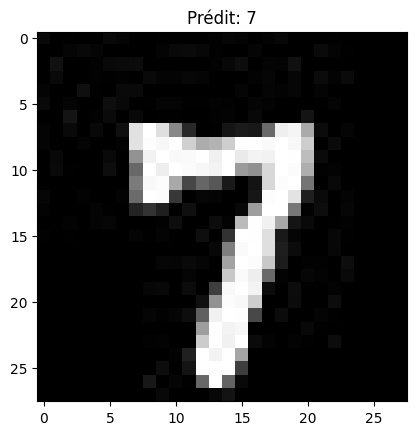

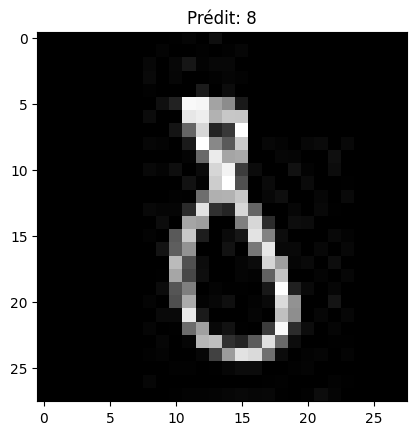

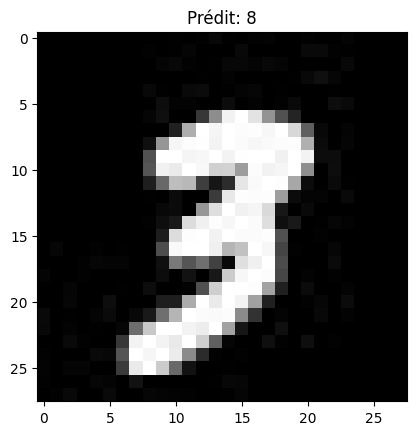

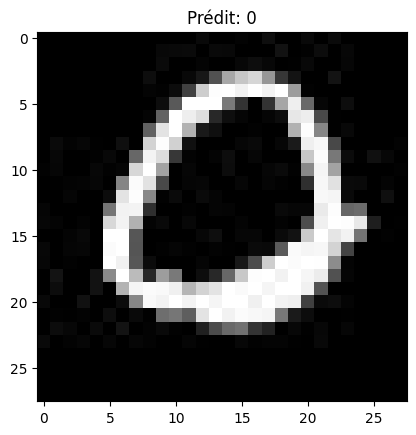

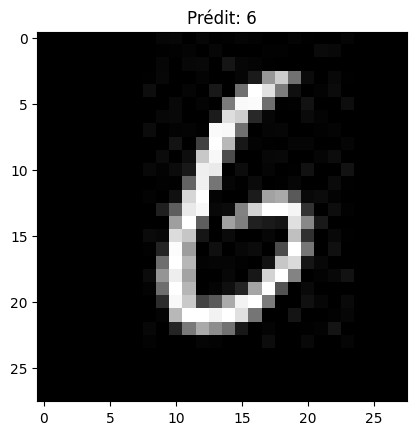

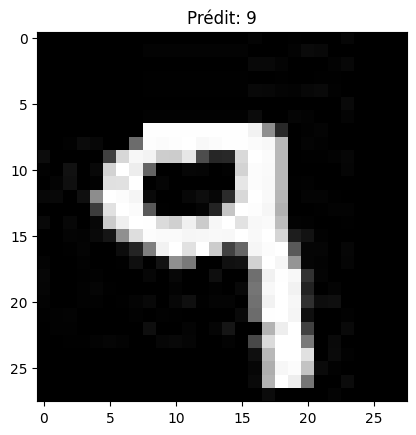

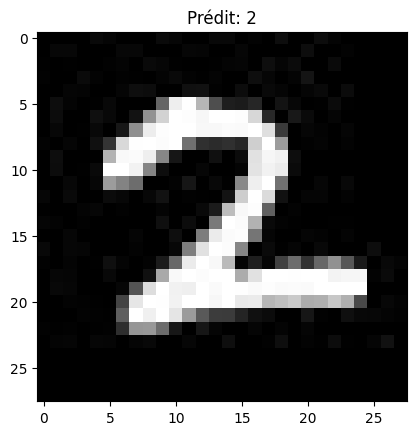

In [ ]:
import matplotlib.pyplot as plt

# Affichez les 10 premières images et étiquettes prédites
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prédit: {predicted_labels[i]}")
    plt.show()


67/67 [==============================] - 0s 2ms/step


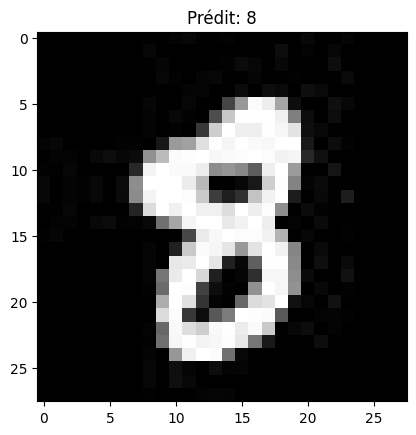

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prédire les étiquettes pour les données de test
predictions = model.predict(test_images.reshape(-1, 28, 28, 1)) # Ajustez selon la forme de votre ensemble de test
predicted_labels = np.argmax(predictions, axis=1)

# Afficher la première image et l'étiquette prédite
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Prédit: {predicted_labels[0]}")
plt.show()


67/67 [==============================] - 0s 3ms/step


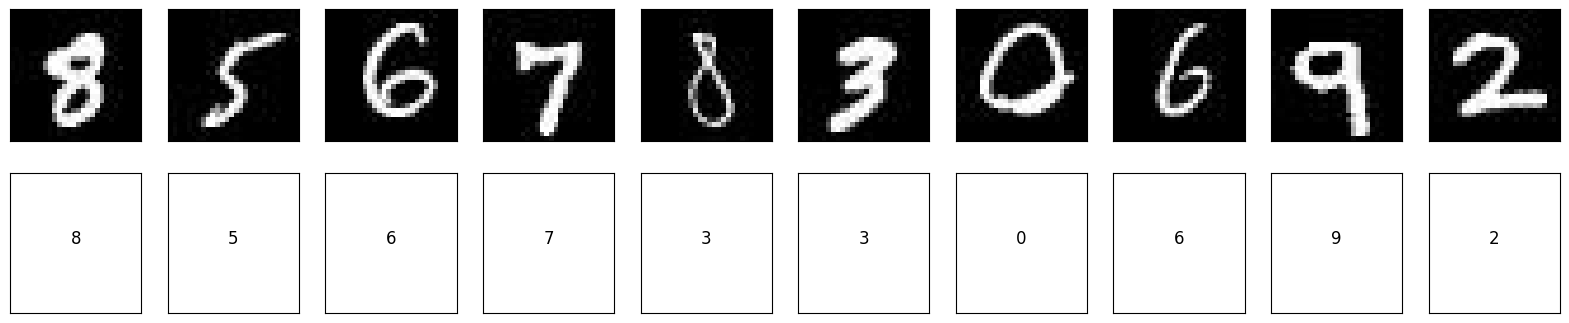

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


predictions = model.predict(test_images.reshape(-1, 28, 28, 1))
predicted_labels = np.argmax(predictions, axis=1)

# Pour afficher les images de test et les prédictions côte à côte
n = 10  # Nombre d'images à afficher
plt.figure(figsize=(20, 4))

for i in range(n):
    # Afficher les images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Afficher les étiquettes prédites (classes)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_labels[i]), fontsize=12, ha='center')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

